# TinyML - Autoencoder 

#### Federal University of Rio Grande do Norte

#### Name: Thommas Kevin Sales Flores

## 0. Install the libraries listed in the requirements.txt file

In [1]:
#!pip install -r requirements.txt

## 1. Importing libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, losses, Model
from eloquent_tensorflow import convert_model

import warnings
warnings.filterwarnings('ignore')

## 2. Load Dataset

In [3]:
(x_train, _), (x_test, _)=tf.keras.datasets.mnist.load_data()

## 3. Splitting the data

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

## 4. AutoEncoder

### 4.1 Create the Encoder Model

In [6]:
reduction_size = 32

encoder = tf.keras.Sequential()
encoder.add(layers.Input(shape= x_train.shape[1:]))
encoder.add(layers.Dense(128, activation='relu'))
encoder.add(layers.Dense(64, activation='relu'))
encoder.add(layers.Dense(reduction_size, activation='relu'))  
encoder.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4.2 Create the Decoder Model

In [7]:
decoder = tf.keras.Sequential()
decoder.add(layers.Input(shape=(reduction_size,)))
decoder.add(layers.Dense(64, activation='relu'))
decoder.add(layers.Dense(128, activation='relu'))
decoder.add(layers.Dense(x_train.shape[1:][0], activation='relu'))
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4.3 Create the AutoEncoder Model

In [8]:
autoencoder = Model(inputs = encoder.input, outputs = decoder(encoder.output))
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 sequential_1 (Sequential)   (None, 784)               111568    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 222384 (868.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Train Model 

In [9]:
autoencoder.compile(optimizer='adamax', loss=losses.MeanSquaredError())

In [10]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50

235/235 [==============================] - 3s 7ms/step - loss: 0.0537 - val_loss: 0.0363
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0325 - val_loss: 0.0294
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0278 - val_loss: 0.0260
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0253 - val_loss: 0.0242
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0240 - val_loss: 0.0233
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0232 - val_loss: 0.0227
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0226 - val_loss: 0.0220
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0221 - val_loss: 0.0216
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0216 - val_loss: 0.0212
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0212 - val_loss: 0.020

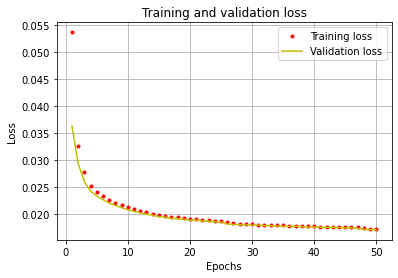

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r.', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.savefig('.\\figures\\history_traing.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Model evaluation

### 6.1 Evaluating the model with train data

In [12]:
autoencoder.evaluate(x_train, x_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0171


0.017134809866547585

### 6.2 Evaluating the model with test data

In [13]:
autoencoder.evaluate(x_test, x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0170


0.017039146274328232

In [29]:
x_test[0].reshape(1,-1).tolist()

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [28]:
encoded_imgs[0].reshape(1,-1).tolist()

[[2.3808906078338623,
  0.0,
  4.5038323402404785,
  7.002038478851318,
  5.001147270202637,
  9.477728843688965,
  1.6929377317428589,
  4.6640191078186035,
  12.06705379486084,
  3.180340051651001,
  5.709208965301514,
  2.779115676879883,
  0.9851800203323364,
  4.689855098724365,
  5.527744293212891,
  0.0,
  3.206313133239746,
  5.984551429748535,
  2.9231224060058594,
  5.275905132293701,
  3.785780429840088,
  4.292290210723877,
  0.0,
  2.886066198348999,
  4.548666954040527,
  0.0,
  3.7035458087921143,
  4.757535934448242,
  4.5344343185424805,
  2.9427804946899414,
  3.8400092124938965,
  5.447134494781494]]

In [26]:
encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(encoded_imgs) 

313/313 [==============================] - 1s 2ms/step


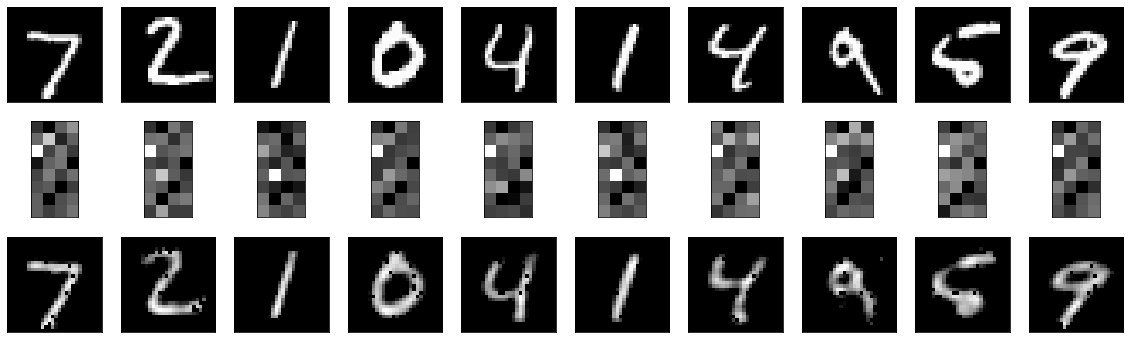

In [15]:
n = 10  # Quantidade de dígitos para mostrar
plt.figure(figsize=(20, 6))
for i in range(n):
    # Imagens Originais
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagens Codificadas
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))  # Ajustando para visualizar a codificação (8x4=32)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagens Reconstruídas
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.savefig('.\\figures\\autoencoder_results.png', dpi=300, bbox_inches='tight')
plt.show()


## 7. Obtaining the model to be implemented in the microcontroller

### 7.1 Encoder

In [16]:
code_encoder = convert_model(encoder)

INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmpsvalo0cj\assets


INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmpsvalo0cj\assets


### 7.2 Decoder

In [17]:
code_decoder = convert_model(decoder)

INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmpq128dako\assets


INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmpq128dako\assets


### 7.3 AutoEncoder

In [18]:
code_autoencoder = convert_model(autoencoder)

INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmpbqbl6pvl\assets


INFO:tensorflow:Assets written to: C:\Users\Thommas\AppData\Local\Temp\tmpbqbl6pvl\assets


## 8 Saves the template in a .h file

### 8.1 Encoder

In [19]:
with open('./Autoencoder/model_encoder.h', 'w') as file:
    file.write(code_encoder)

### 8.2 Decoder

In [20]:
with open('./Autoencoder/model_decoder.h', 'w') as file:
    file.write(code_decoder)

### 8.3 AutoEncoder

In [21]:
with open('./Autoencoder/model_autoencoder.h', 'w') as file:
    file.write(code_autoencoder)